In [1]:
! pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importing necessary libraries

In [2]:
import pandas as pd
import requests #
import plotly.express as px #powerful and user-friendly data visualization library in Python
from sklearn.model_selection import train_test_split #Splitting the data into training and testing subsets
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error



# Read Data

In [3]:
url = 'https://raw.githubusercontent.com/jarif87/DataSets/main/height_weight.csv'

response = requests.get(url)

data = pd.read_csv(url)

data.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [4]:
data.shape

(3501, 2)

# Scatter Plot Height VS Weight Using Plotly

In [5]:
fig = px.scatter(data, x="Height", y="Weight")
fig.show()

# Customize Scatter Plot Using Plotly

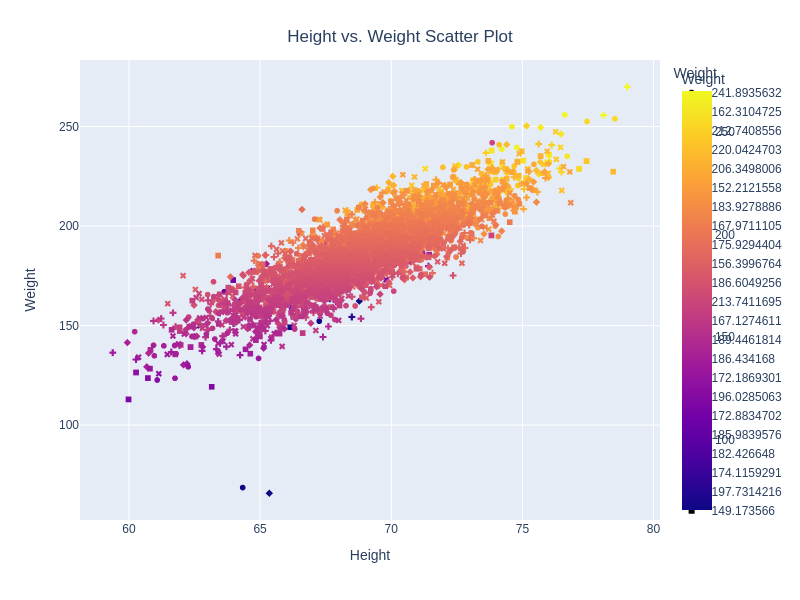

In [6]:
fig = px.scatter(data, x="Height", y="Weight", color="Weight", symbol="Weight")
fig.update_layout(
    title={
        'text': "Height vs. Weight Scatter Plot",
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    width=800,  
    height=600 
)
fig.show("png")

In [7]:
train_data=data.drop("Weight",axis=1) #axis=1 means column, 0 means row
label_data=data[["Weight"]]

In [8]:
X_train,X_test,Y_train,Y_test=train_test_split(train_data,label_data,test_size=0.3,random_state=42)

# create Linear Regression Model

In [9]:
model=LinearRegression()

In [10]:
model.fit(X_train,Y_train)

LinearRegression()

# Model Prediction

In [11]:
pred=model.predict(X_test)

# coefficient

In [12]:
m = model.coef_
print(m)

[[5.95092905]]


# Intercept

In [13]:
c=model.intercept_
print(c)

[-224.00779357]


In [14]:
df=data.copy()
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


# Compare True Data And Predicted Data

In [15]:
df["Model_Predict"]=model.predict(data[["Height"]])
df.head()

,Height,Weight,Model_Predict
0,73.847017,241.893563,215.450566
1,68.781904,162.310473,185.308438
2,74.110105,212.740856,217.016186
3,71.730978,220.042470,202.858170
4,69.881796,206.349801,191.853816


In [16]:
true_data=X_test
pred_data=pred
true_data = np.ravel(true_data)
pred_data = np.ravel(pred_data)
# # Create DataFrame
df2 = pd.DataFrame({'True': true_data, 'Predicted': pred_data})
df2

,True,Predicted
0,70.324753,194.489825
1,67.271615,176.320817
2,69.142273,187.452967
3,77.160801,235.170658
4,72.676961,208.487646
...,...,...
1046,68.390109,182.976892
1047,69.573592,190.019714
1048,63.009783,150.958955
1049,67.362064,176.859072


# Best Fit Line

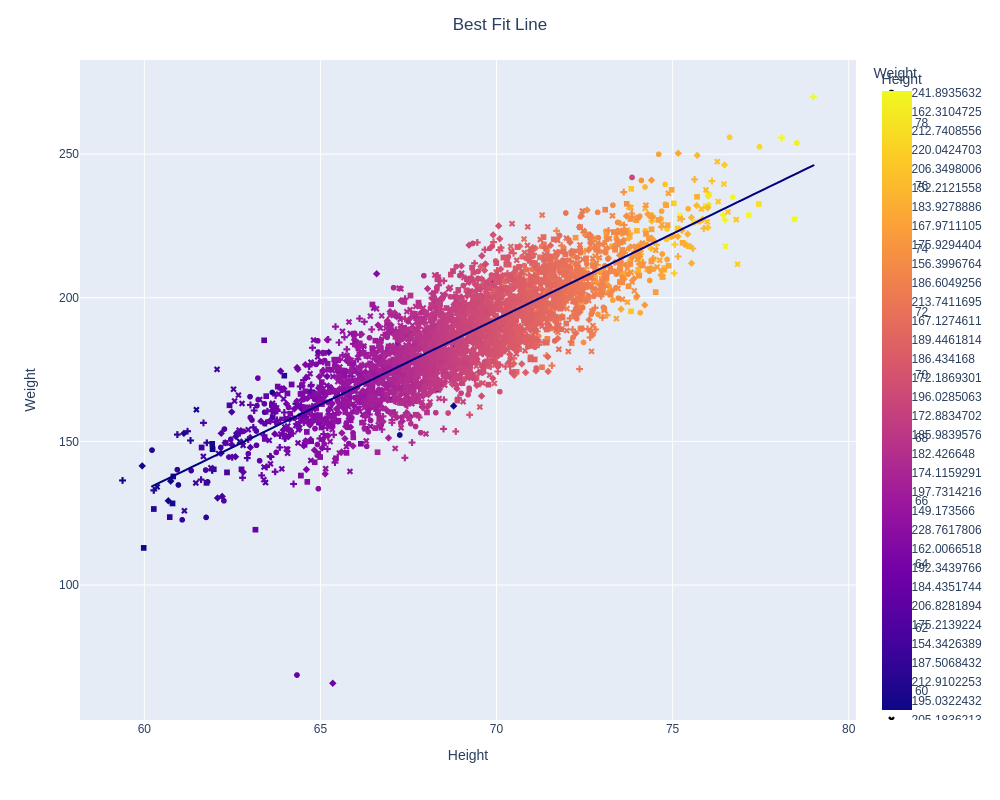

In [17]:
fig = px.scatter(data, "Height", "Weight",color="Height",symbol="Weight")  # Create the scatter plot figure
line_trace=px.line(df2,"True","Predicted")  # Add the line plot trace
line_trace.update_traces(line=dict(color="navy")) # add color
fig.add_trace(line_trace.data[0]) # Add the line plot trace to the figure
fig.update_layout(
    title="Best Fit Line",
    title_x=0.5,  # Center the title
    height=800,   # Increase the figure height
    width=1000     # Increase the figure width
)
fig.show("png")


In [18]:
true_data=Y_test
pred_data=pred
true_data = np.ravel(true_data)
pred_data = np.ravel(pred_data)
# # Create DataFrame
df2 = pd.DataFrame({'True': true_data, 'Predicted': pred_data})
df2

,True,Predicted
0,193.346560,194.489825
1,182.898115,176.320817
2,175.832447,187.452967
3,228.707301,235.170658
4,217.561415,208.487646
...,...,...
1046,179.352182,182.976892
1047,165.784742,190.019714
1048,147.901820,150.958955
1049,177.375008,176.859072


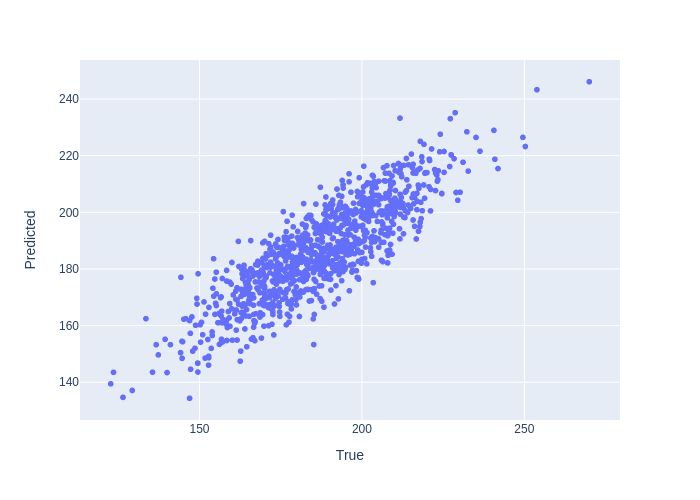

In [19]:
fig=px.scatter(df2,"True","Predicted")
fig.show("png")

# Mean squared error

In [20]:
mse=mean_squared_error(Y_test,pred)
print("Mean Squared Error : {}".format(mse))

Mean Squared Error : 102.76672319484601


# Mean absolute error

In [21]:
mae= mean_absolute_error(Y_test,pred)
print("Mean Absolute Error : {}".format(mae))


Mean Absolute Error : 8.221025004936374
